# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 5: Population Dynamics
## 04.26.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats
import time

In [2]:
sns.set_style(style='whitegrid')

In [72]:
def mode_choose(file, mode, odeint):
    
    current_mode = ('..\\Release\\' + file + '.exe ' +
                    mode + ' ' +
                    odeint + ' '
                   )
                    
    if(file == 'popdin_log'):
        
        current_mode += (str(n_0) + ' ' +
                         str(k) + ' ' +
                         str(w_out) + ' ' +
                         str(w_in) + ' '
                        )
        
    elif(file == 'popdin_conlog'):
        current_mode += (str(n_0_1) + ' ' +
                         str(n_0_2) + ' ' +
                         str(k_1) + ' ' +
                         str(k_2) + ' ' +
                         str(w_out_1) + ' ' +
                         str(w_in_1) + ' ' +
                         str(w_out_2) + ' ' +
                         str(w_in_2) + ' ' +
                         str(alpha) + ' ' +
                         str(beta) + ' '
                        )
        
    elif(file == 'popdin_lv'):
        pass
        
    else:
        print('fu')
                    
    current_mode += (str(sim_time) + ' ' +
                     str(dt) + ' ' +
                     str(accuracy))

    return(current_mode)

## Logistic model
### Initial conditions

In [53]:
n_0 = 10
k = 100
w_out = 0.1
w_in = 0.6

# Step size
dt = 1e-03
# Adaptive accuracy of simulation
accuracy = 1e-12

# Number of time units to plot
sim_time = 25

# Others
steps = 1
image_dpi = 150
image_format = 'pdf'
image_path = '..\\Documentation\\src\\images\\'

### Single run

In [58]:
current_mode = mode_choose(file='popdin_log', mode='fixed', odeint='rkck')
os.system(current_mode)
data_fixed_log = np.genfromtxt('fixed.dat')

current_mode = mode_choose(file='popdin_log', mode='adaptive', odeint='rkck')
os.system(current_mode)
data_adaptive_log = np.genfromtxt('adaptive.dat')

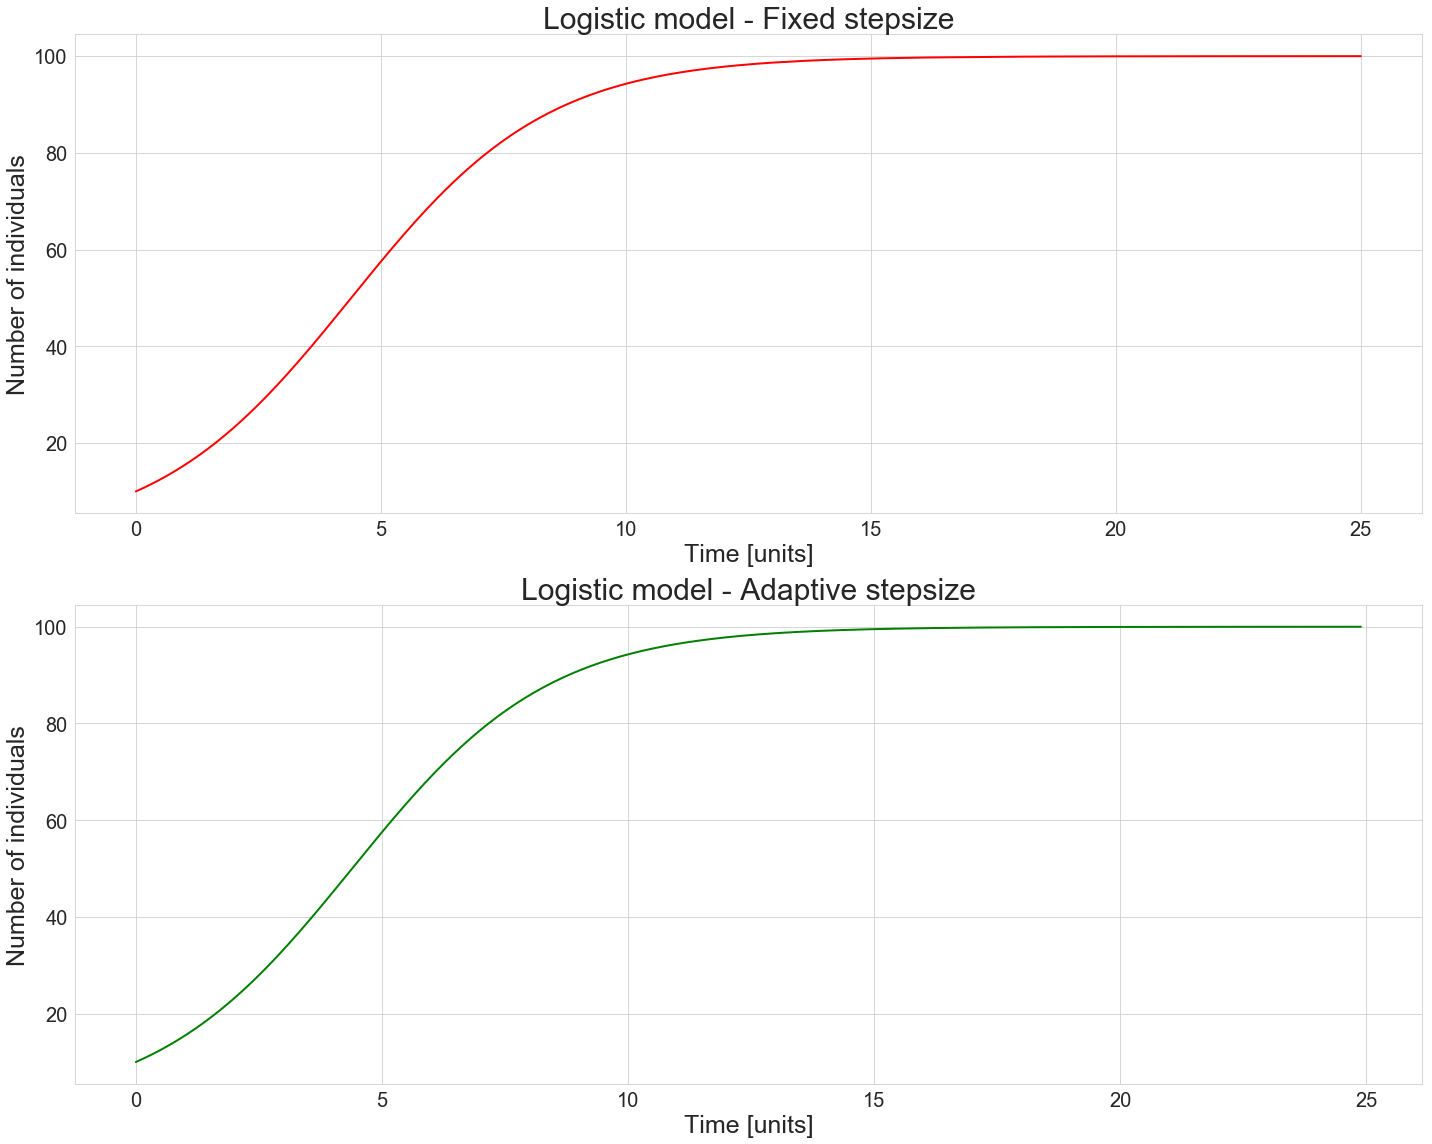

In [42]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 10

axes[0].plot(data_fixed[:,0], data_fixed[:,1],
         color='red', lw=2)

axes[1].plot(data_adaptive[:,0], data_adaptive[:,1],
         color='green', lw=2)

axes[0].set_title('Logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Logistic model - Adaptive stepsize', fontsize=titlesize)

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.show()

### Numerous runs

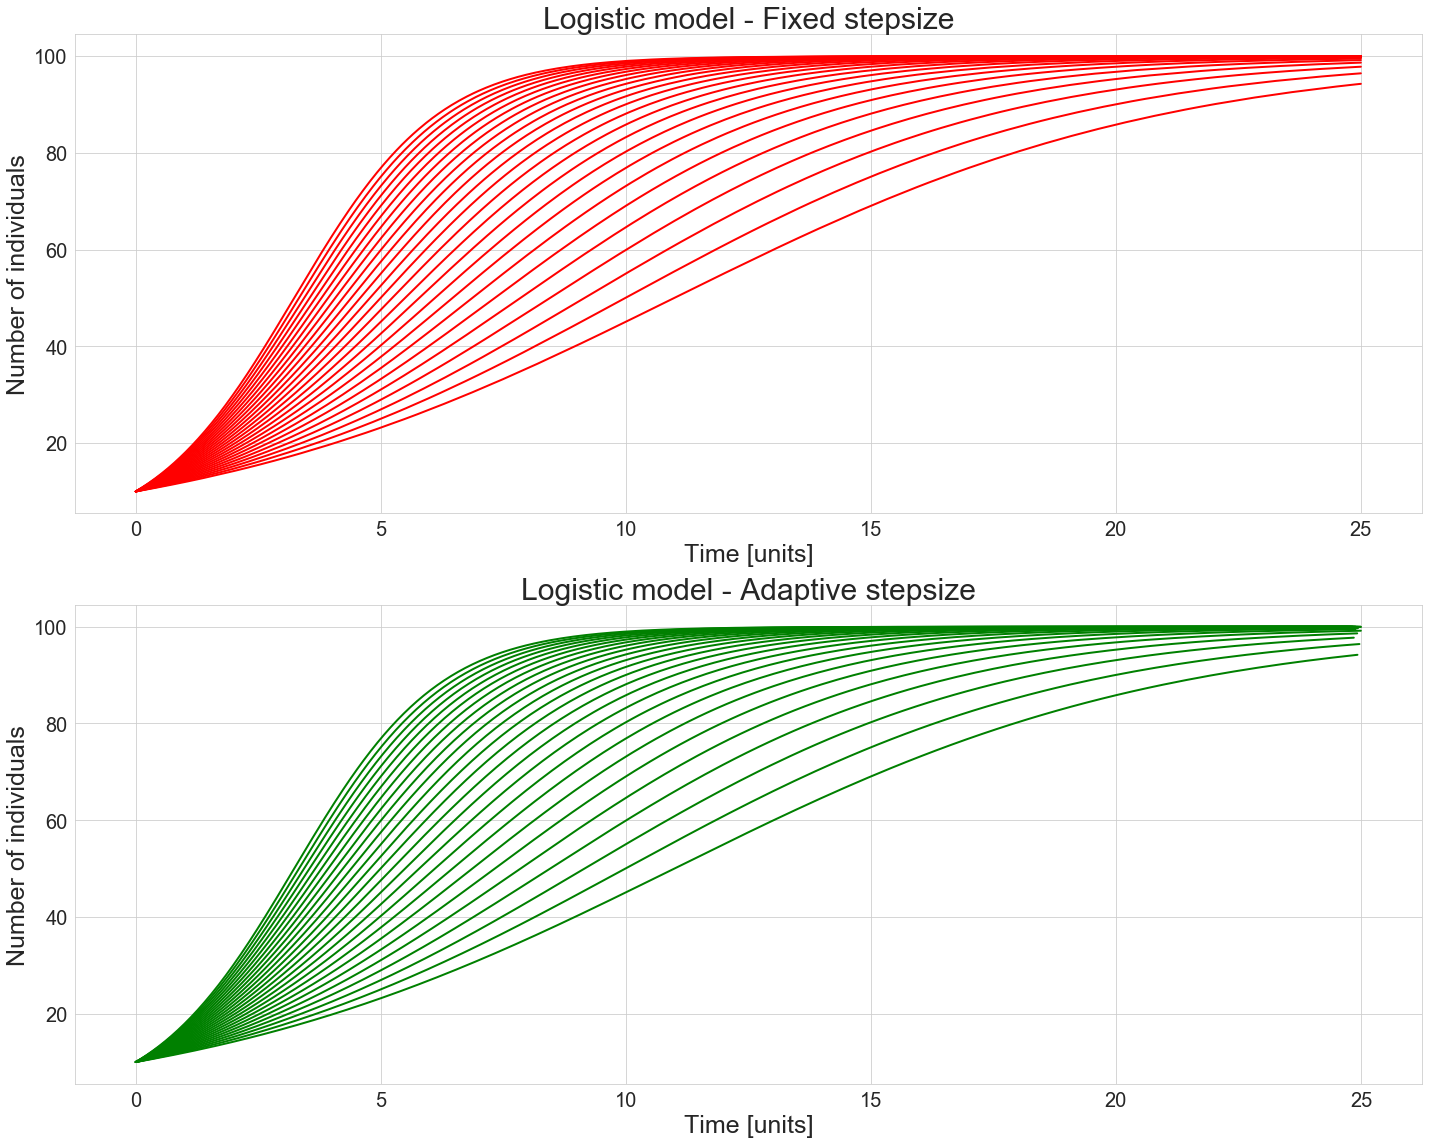

In [85]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 10

for i in [j/100 for j in range(50, 100, 2)]:

    w_out = 0.3
    w_in = i

    current_mode = mode_choose(file='popdin_log', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_log', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive = np.genfromtxt('adaptive.dat')
    
    axes[0].plot(data_fixed[:,0], data_fixed[:,1],
             color='red', lw=2)

    axes[1].plot(data_adaptive[:,0], data_adaptive[:,1],
             color='green', lw=2)

axes[0].set_title('Logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Logistic model - Adaptive stepsize', fontsize=titlesize)

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'logistic_model.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Connected logistic model
### Initial conditions

In [79]:
n_0_1 = 10
n_0_2 = 20
k_1 = 100
k_2 = 100
w_out_1 = 0.1
w_in_1 = 0.6
w_out_2 = 0.1
w_in_2 = 0.6
alpha = 0.1
beta = 0.9

# Step size
dt = 1e-03
# Adaptive accuracy of simulation
accuracy = 1e-12

# Number of time units to plot
sim_time = 25

### Single run

In [80]:
current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
os.system(current_mode)
data_fixed_conlog = np.genfromtxt('fixed.dat')

current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
os.system(current_mode)
data_adaptive_conlog = np.genfromtxt('adaptive.dat')

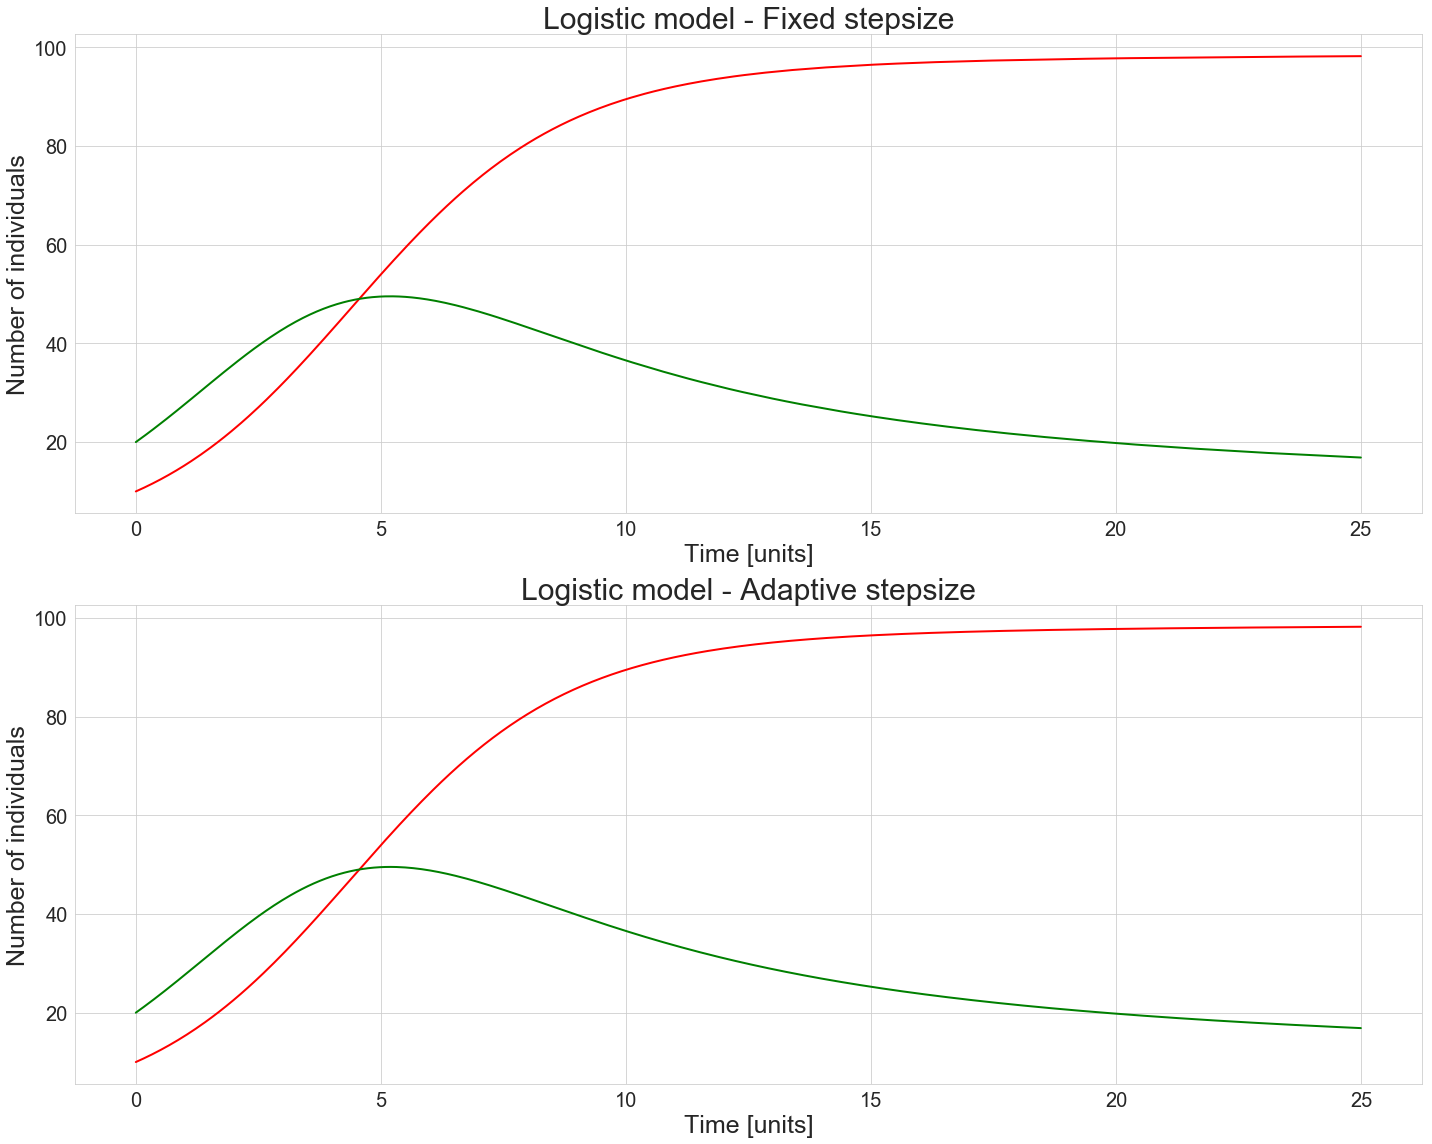

In [81]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 10

axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,1],
         color='red', lw=2)

axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,2],
         color='green', lw=2)

axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,1],
         color='red', lw=2)

axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,2],
         color='green', lw=2)

axes[0].set_title('Connected logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Connected logistic model - Adaptive stepsize', fontsize=titlesize)

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.show()

### Numerous runs

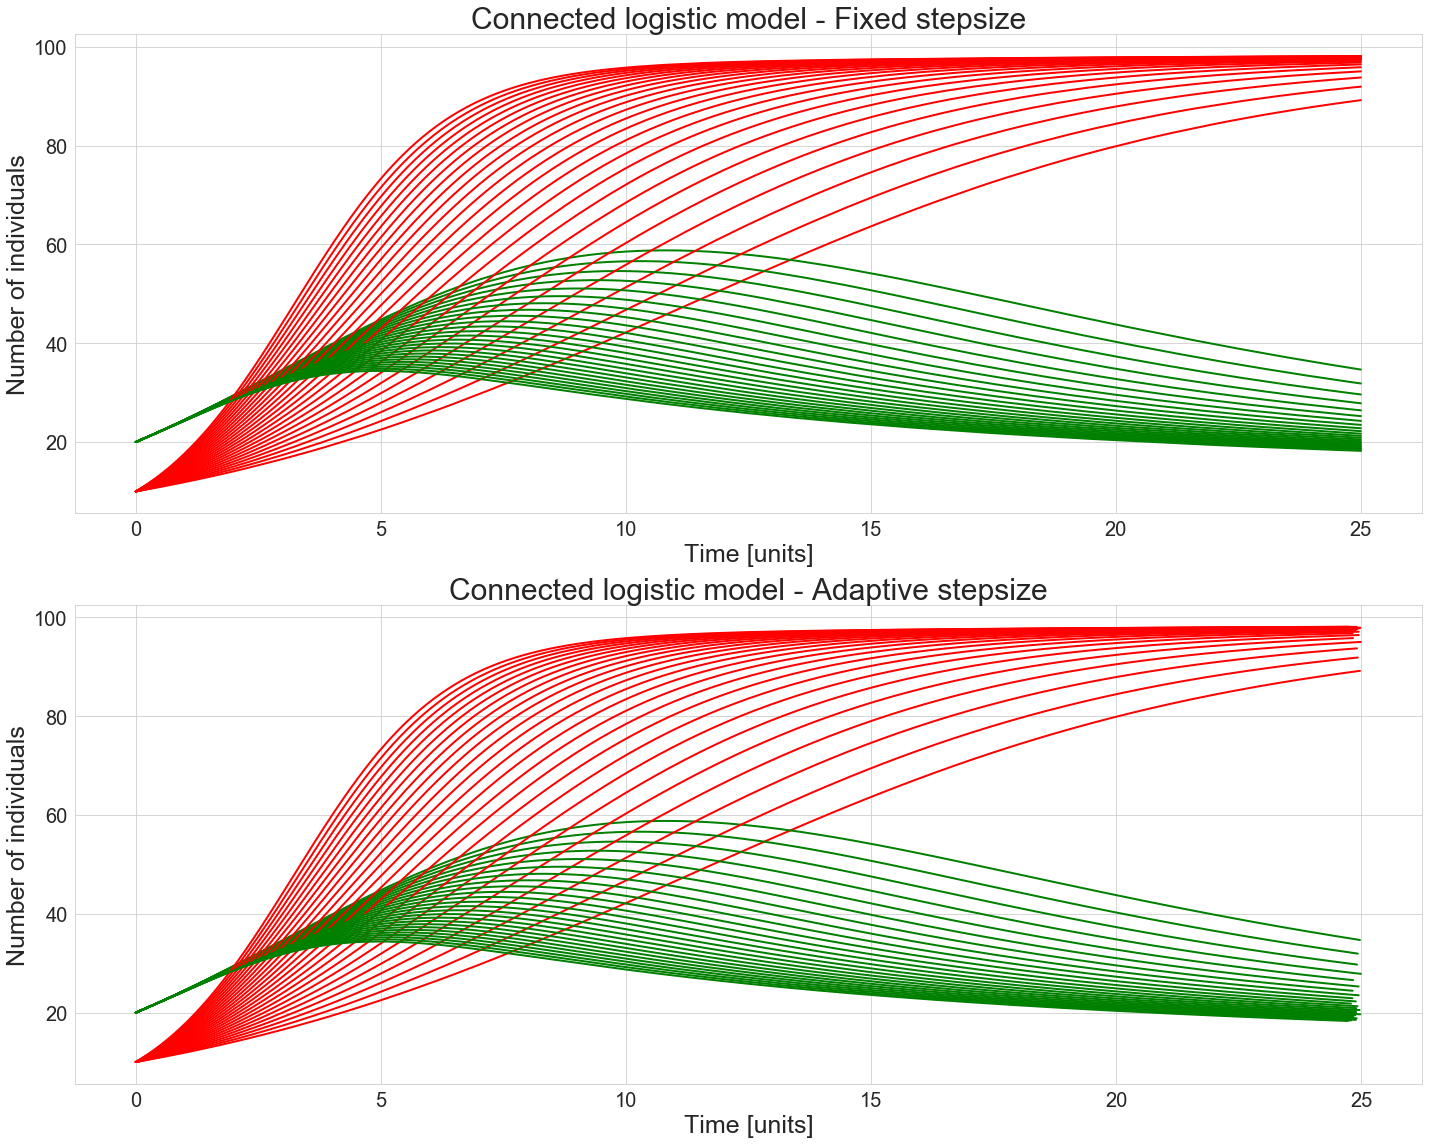

In [84]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 10

for i in [j/100 for j in range(50, 100, 2)]:

    w_out_1 = 0.3
    w_in_1 = i
    
    w_out_2 = 0.3
    w_in_2 = 0.6

    current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_conlog = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive_conlog = np.genfromtxt('adaptive.dat')
    
    axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,1],
             color='red', lw=2)
    
    axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,2],
             color='green', lw=2)

    axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,1],
             color='red', lw=2)
    
    axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,2],
             color='green', lw=2)

axes[0].set_title('Connected logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Connected logistic model - Adaptive stepsize', fontsize=titlesize)

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'connected_logistic_model.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Lotka-Volterra-modell
### Initial conditions

In [79]:
n_0_1 = 10
n_0_2 = 20
k_1 = 100
k_2 = 100
w_out_1 = 0.1
w_in_1 = 0.6
w_out_2 = 0.1
w_in_2 = 0.6
alpha = 0.1
beta = 0.9

# Step size
dt = 1e-03
# Adaptive accuracy of simulation
accuracy = 1e-12

# Number of time units to plot
sim_time = 25

### Single run

In [80]:
current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
os.system(current_mode)
data_fixed_conlog = np.genfromtxt('fixed.dat')

current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
os.system(current_mode)
data_adaptive_conlog = np.genfromtxt('adaptive.dat')

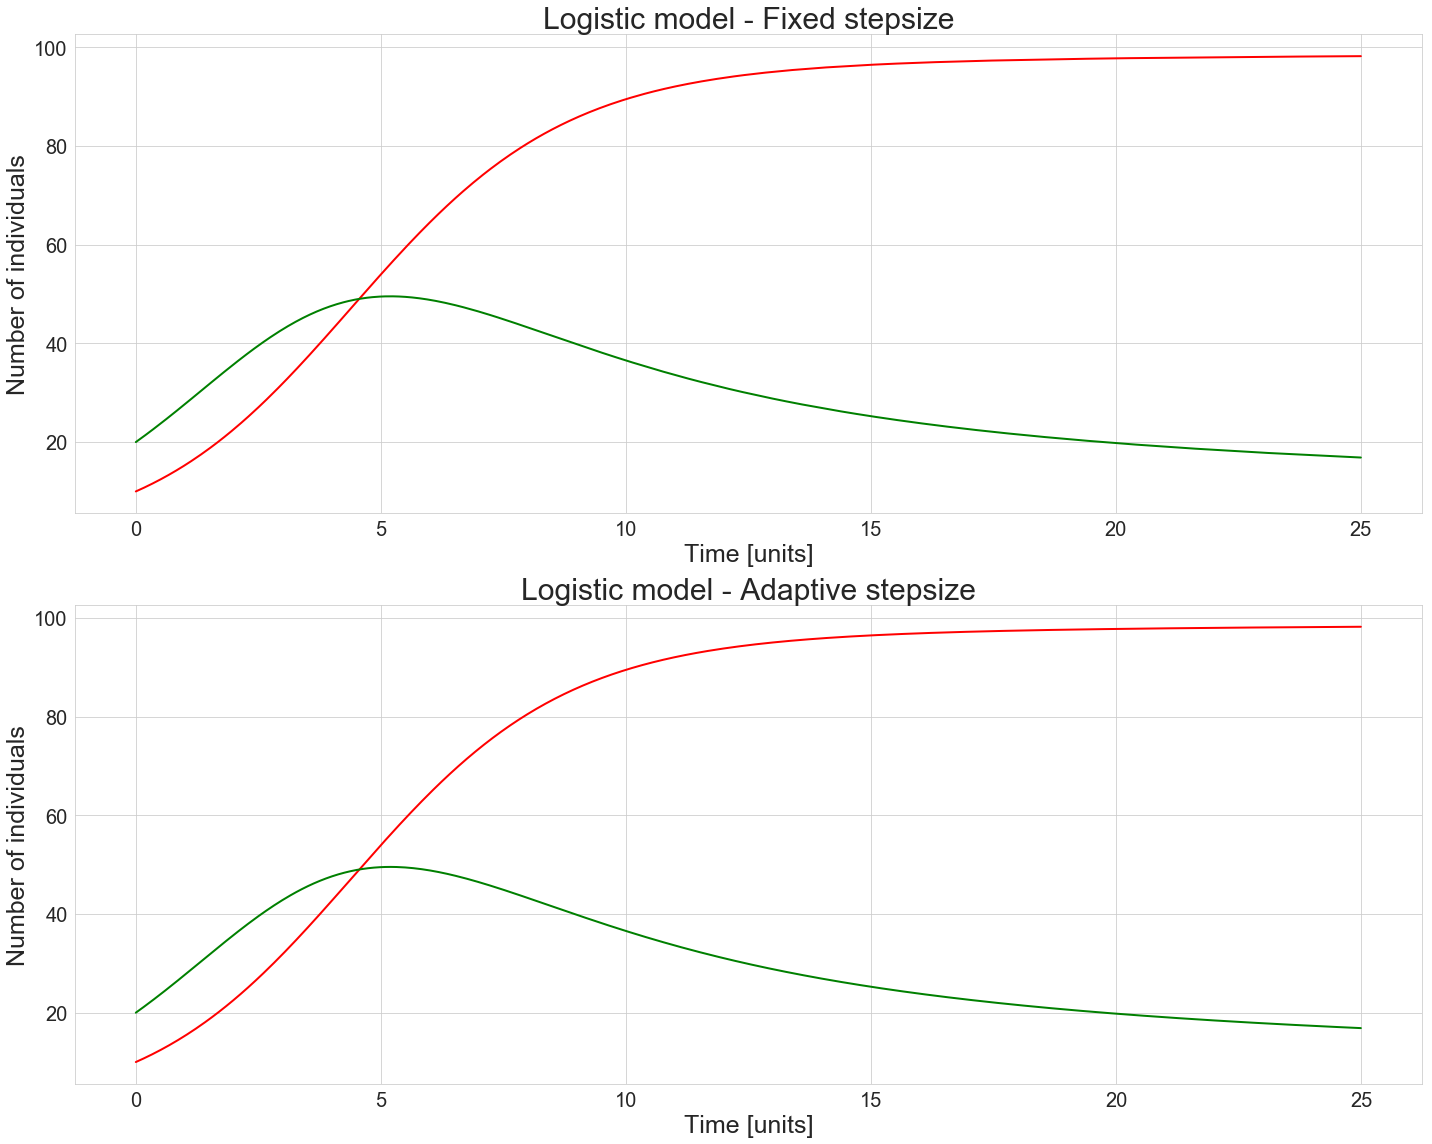

In [81]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 10

axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,1],
         color='red', lw=2)

axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,2],
         color='green', lw=2)

axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,1],
         color='red', lw=2)

axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,2],
         color='green', lw=2)

axes[0].set_title('Connected logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Connected logistic model - Adaptive stepsize', fontsize=titlesize)

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.show()

### Numerous runs

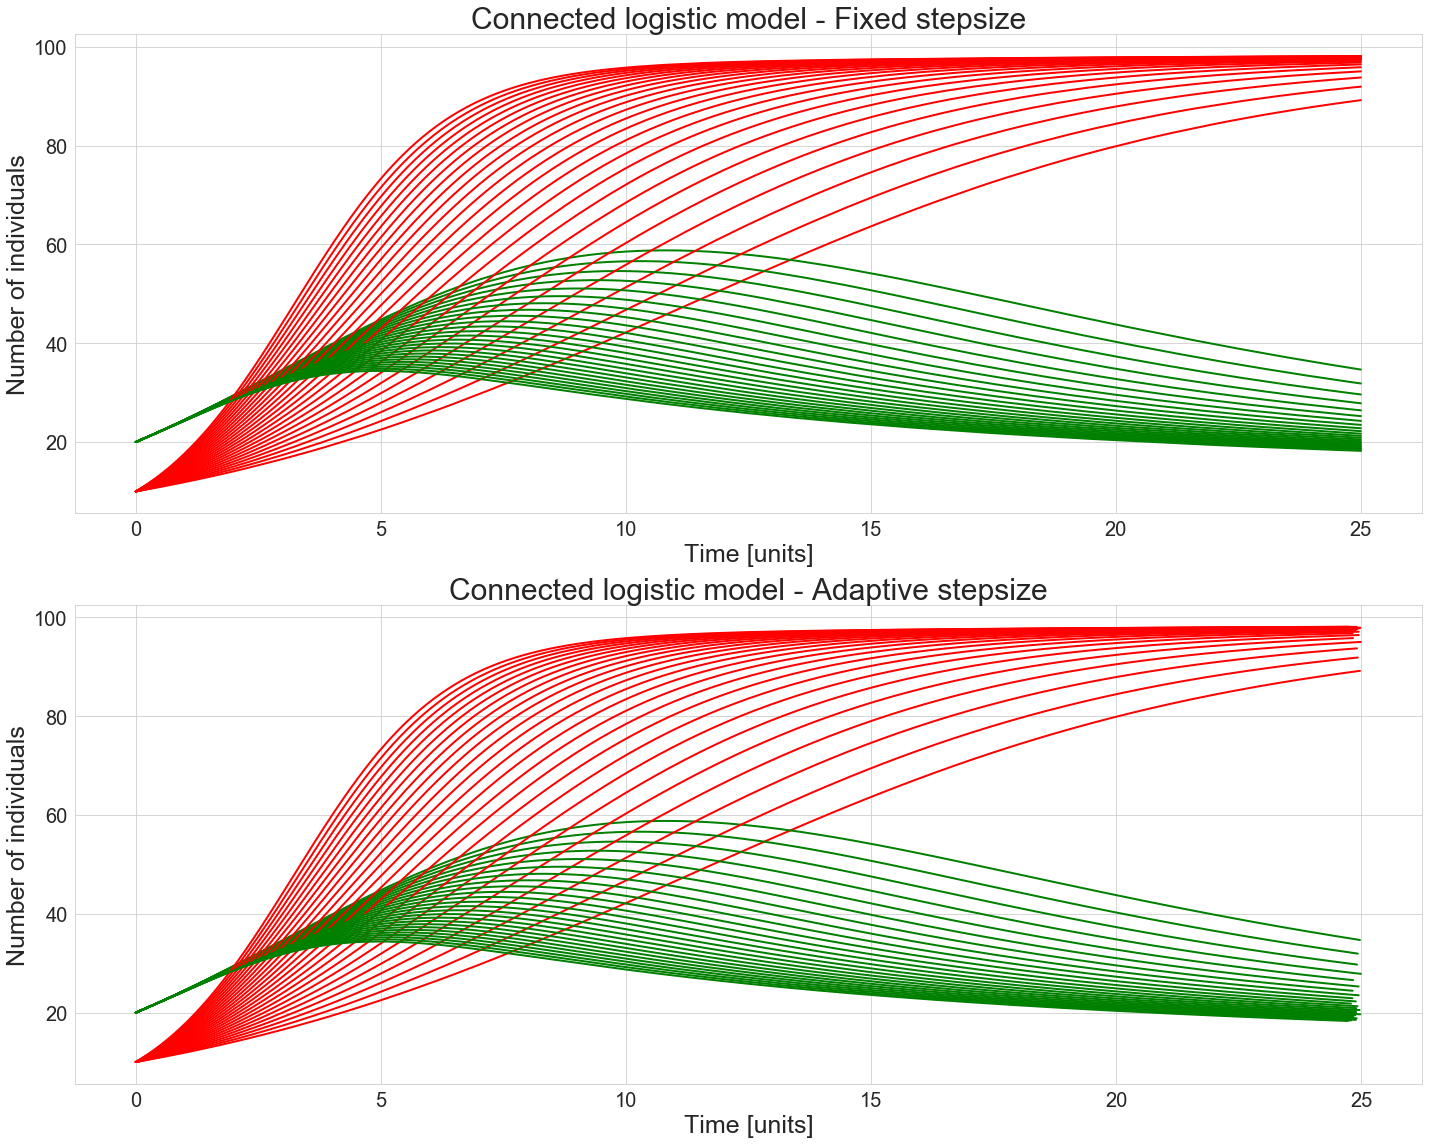

In [84]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 10

for i in [j/100 for j in range(50, 100, 2)]:

    w_out_1 = 0.3
    w_in_1 = i
    
    w_out_2 = 0.3
    w_in_2 = 0.6

    current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_conlog = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive_conlog = np.genfromtxt('adaptive.dat')
    
    axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,1],
             color='red', lw=2)
    
    axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,2],
             color='green', lw=2)

    axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,1],
             color='red', lw=2)
    
    axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,2],
             color='green', lw=2)

axes[0].set_title('Connected logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Connected logistic model - Adaptive stepsize', fontsize=titlesize)

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'connected_logistic_model.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()